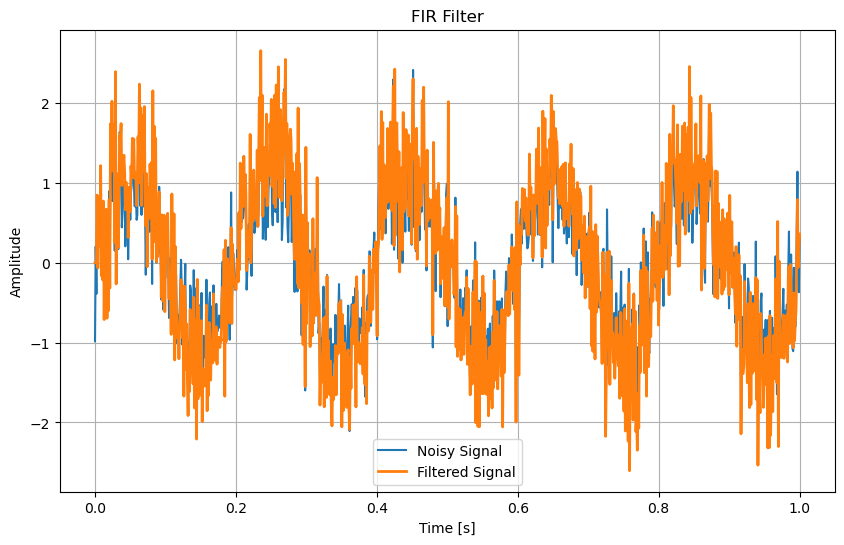

In [18]:
#FIR
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    """
    FIR filter implementation.
    
    Parameters:
    x : ndarray
        Input signal.
    b : ndarray
        Filter coefficients.
    
    Returns:
    y : ndarray
        Filtered output signal.
    """
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

# Example usage and plotting
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # Signal with noise
b = [1, -0.2, 0.5]  # FIR coefficients

y = fir_filter(x, b)

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


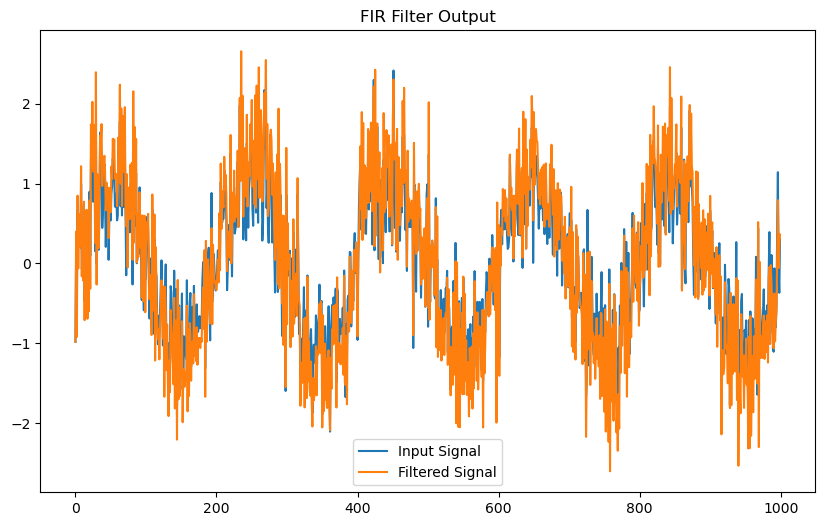

In [19]:
#FIR z scipy.signal
import numpy as np

# Define FIR Filter
def fir_filter(b, x):
    M = len(b)  # Number of coefficients
    y = np.convolve(x, b, mode='full')[:len(x)]  # Apply filter
    return y

# Example FIR Coefficients and Input Signal
b = [1, -0.2, 0.5]  # FIR coefficients
#x = np.sin(2 * np.pi * 0.05 * np.arange(100))  # Example input signal

# Filter the Signal
y = fir_filter(b, x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("FIR Filter Output")
plt.show()


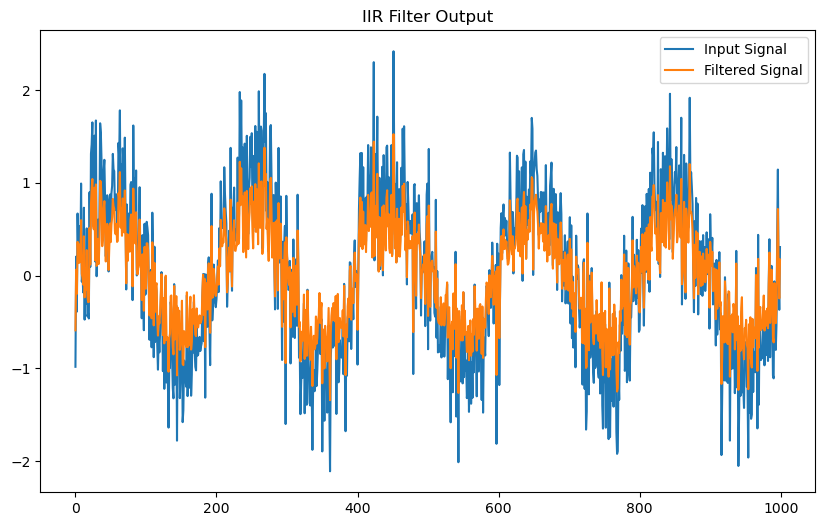

In [20]:
# IIR with denominator in scipy.signal
from scipy.signal import lfilter, freqz

# Define IIR Filter Coefficients
b = [0.6, 0.3]  # Numerator
a = [1, 0.4]   # Denominator

# Example Input Signal
#x = np.sin(2 * np.pi * 0.05 * np.arange(100))

# Filter the Signal
y = lfilter(b, a, x)

# Plot the Output
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("IIR Filter Output")
plt.show()


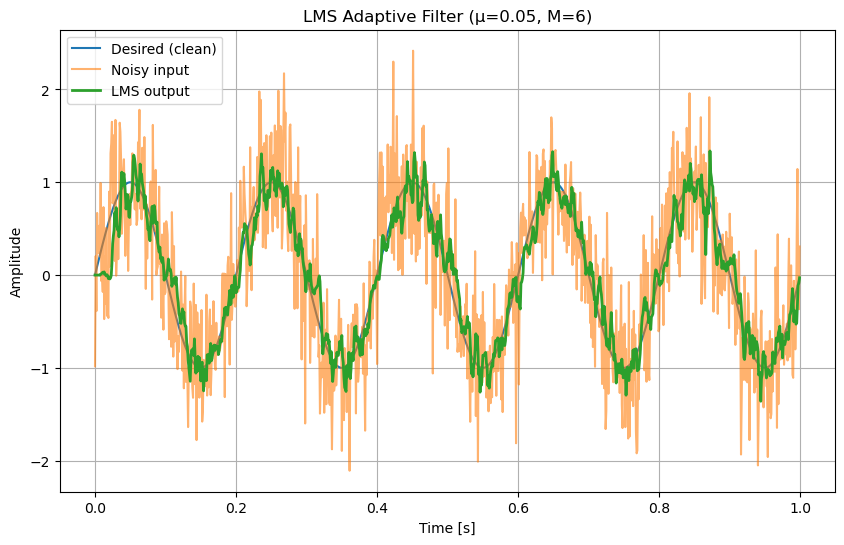

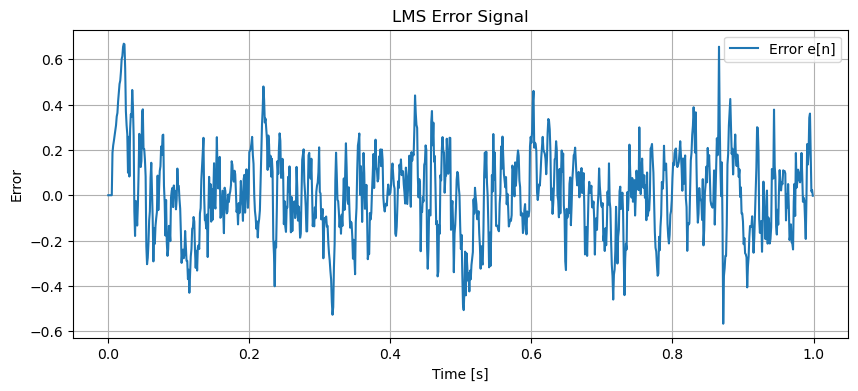

Final weights w = [0.06317013 0.09092526 0.0996358  0.12149748 0.13652324 0.11790624]


In [22]:
#lms filter
def lms_filter(x, d, mu=0.05, M=6):
    """
    LMS adaptive filter
    x : input (noisy) signal, length N
    d : desired signal, length N
    mu: step size
    M : filter length (taps)
    """
    N = len(x)
    if len(d) != N:
        raise ValueError(f"d must have the same length as x (len(d)={len(d)}, len(x)={N})")

    w = np.zeros(M, dtype=float)
    y = np.zeros(N, dtype=float)
    e = np.zeros(N, dtype=float)

    for n in range(M, N):
        x_vec = x[n-M:n][::-1]
        y[n] = np.dot(w, x_vec)
        e[n] = d[n] - y[n]
        w += mu * e[n] * x_vec

    return y, e, w

# Quick sanity check:
if "x" not in globals():
    raise NameError("Variable `x` is not defined. Generate/load your noisy signal into `x` first.")

x = np.asarray(x).ravel()
N = len(x)

# Build time axis and desired (clean) sinusoid with matching length
fs = 1000
t = np.arange(N) / fs
f0 = 5
d = np.sin(2*np.pi*f0*t)

# Run LMS (per task: µ=0.05, M=6)
mu = 0.05
M = 6
y, e, w = lms_filter(x, d, mu=mu, M=M)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, d, label="Desired (clean)")
plt.plot(t, x, label="Noisy input", alpha=0.6)
plt.plot(t, y, label="LMS output", linewidth=2)
plt.title(f"LMS Adaptive Filter (µ={mu}, M={M})")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, e, label="Error e[n]")
plt.title("LMS Error Signal")
plt.xlabel("Time [s]")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

print("Final weights w =", w)
